# Wine recognition data

Updated Sept 21, 1998 by C.Blake : Added attribute information

Estos datos son los resultados de un análisis químico de vinos cultivados en la misma región de Italia pero procedentes de tres cultivares diferentes. El análisis determinó las cantidades de 13 constituyentes encontrados en cada uno de los tres tipos de vinos. 

Sources:
   (a) Forina, M. et al, PARVUS - An Extendible Package for Data
       Exploration, Classification and Correlation. Institute of Pharmaceutical
       and Food Analysis and Technologies, Via Brigata Salerno, 
       16147 Genoa, Italy.

   (b) Stefan Aeberhard, email: stefan@coral.cs.jcu.edu.au
   (c) July 1991

Las variables con las que contamos son las siguientes, según nos indica el archivo que acompaña a los datos.

**TIPOS**  

- Alcohol; AL  
- Ácido málico; MA  
- Ceniza; ASH  
- Alcalinidad de la ceniza; ALC  
- Magnesio; MAG  
- Fenoles totales; TP  
- Flavanoides; FLA  
- Fenoles no flavanoides; NP  
- Proantocianinas; PRO-C  
- Intensidad de color; CI  
- Tono; HUE  
- OD280/OD315 de vinos diluidos; DW  
- Prolina; PRO-L

### Importamos las librerias que vamos a utilizar para todos los ejercicios

In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

# Preprocesado y análisis
# ==============================================================================
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

### Gargamos el conjunto de datos WineData

In [2]:
#para ello utilizaremos la libreria pandas
df = pd.read_csv('./wineData.txt', encoding='utf-8', sep=',', header=None)
df.head(7)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290


Observamos que las columnas no tienen cabecera.

In [3]:
df.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], dtype='int64')

### Añadimos los nombres de la cabecera según nos indica la documentación del dataset

In [4]:
cabecera = ['Tipos','AL', 'MA', 'ASH', 'ALC', 'MAG', 'TP', 'FLA', 'NP', 'PRO-C', 'CI','HUE','DW','PRO-L']
df.columns = cabecera

Comprobamos que se han aplicado correctamente.

In [5]:
df.columns

Index(['Tipos', 'AL', 'MA', 'ASH', 'ALC', 'MAG', 'TP', 'FLA', 'NP', 'PRO-C',
       'CI', 'HUE', 'DW', 'PRO-L'],
      dtype='object')

## Análisis descriptivo y visual de los datos

In [6]:
df.head()

,Tipos,AL,MA,ASH,ALC,MAG,TP,FLA,NP,PRO-C,CI,HUE,DW,PRO-L
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
df.tail()

,Tipos,AL,MA,ASH,ALC,MAG,TP,FLA,NP,PRO-C,CI,HUE,DW,PRO-L
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


### Comprobamos el número de filas y columnas

In [8]:
df.shape

(178, 14)

### Comprobamos la tipología de los datos del dataframe.

Observamos que existen dos columnas MAG y PRO-L con valores enteros, el resto de columnas son valores decimales.

In [9]:
df.dtypes

Tipos      int64
AL       float64
MA       float64
ASH      float64
ALC      float64
MAG        int64
TP       float64
FLA      float64
NP       float64
PRO-C    float64
CI       float64
HUE      float64
DW       float64
PRO-L      int64
dtype: object

### Comprobamos si existe algún valor NaN o nulo.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Tipos   178 non-null    int64  
 1   AL      178 non-null    float64
 2   MA      178 non-null    float64
 3   ASH     178 non-null    float64
 4   ALC     178 non-null    float64
 5   MAG     178 non-null    int64  
 6   TP      178 non-null    float64
 7   FLA     178 non-null    float64
 8   NP      178 non-null    float64
 9   PRO-C   178 non-null    float64
 10  CI      178 non-null    float64
 11  HUE     178 non-null    float64
 12  DW      178 non-null    float64
 13  PRO-L   178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [11]:
df.isnull().sum()

Tipos    0
AL       0
MA       0
ASH      0
ALC      0
MAG      0
TP       0
FLA      0
NP       0
PRO-C    0
CI       0
HUE      0
DW       0
PRO-L    0
dtype: int64

No existe ningún NaN ni valores nulos.

### Realizamos un análisis estadístico del dataset

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Tipos,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
AL,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
MA,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ASH,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
ALC,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
MAG,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
TP,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
FLA,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
NP,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
PRO-C,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


In [13]:
df.median()

Tipos      2.000
AL        13.050
MA         1.865
ASH        2.360
ALC       19.500
MAG       98.000
TP         2.355
FLA        2.135
NP         0.340
PRO-C      1.555
CI         4.690
HUE        0.965
DW         2.780
PRO-L    673.500
dtype: float64

### Comprobamos que correlación tiene las columnas

In [14]:
df.corr()

,Tipos,AL,MA,ASH,ALC,MAG,TP,FLA,NP,PRO-C,CI,HUE,DW,PRO-L
Tipos,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
AL,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
MA,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
ASH,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
ALC,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
MAG,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
TP,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
FLA,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
NP,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
PRO-C,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


### Visualizamos en una matríz de correlación

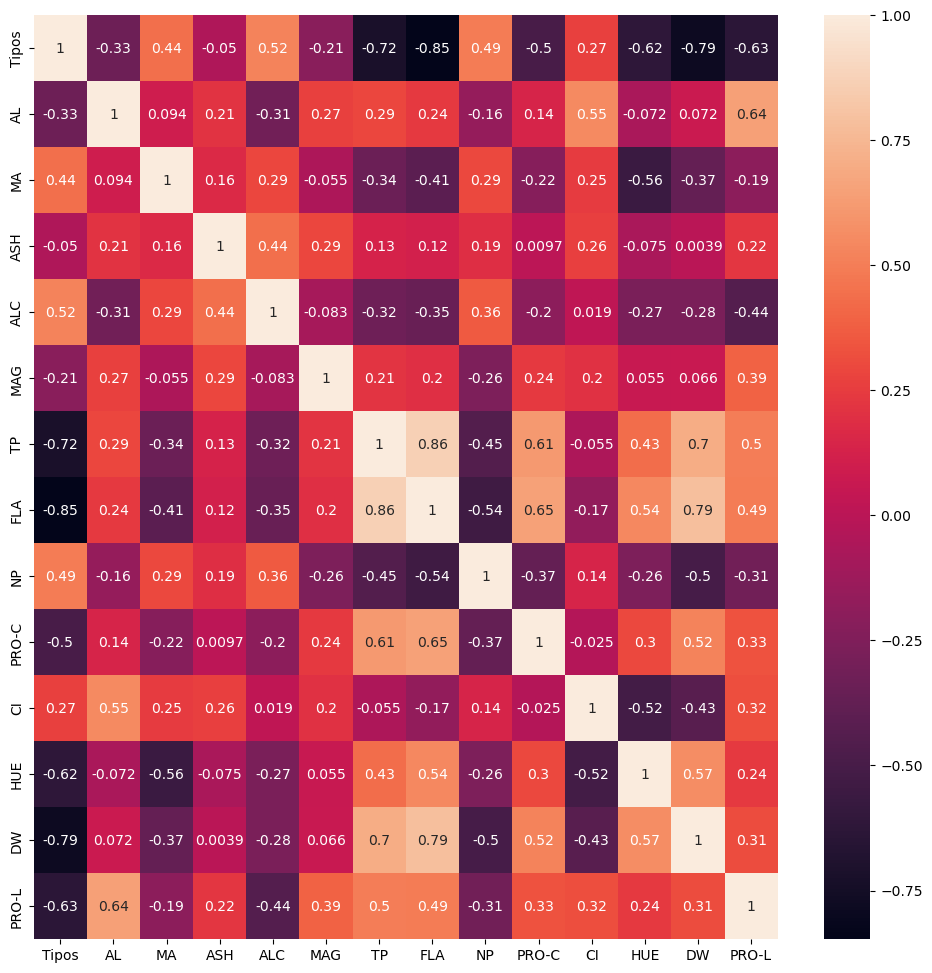

In [15]:
plt.figure(figsize=(12, 12))
matriz_corr = df.corr()
sns.heatmap(matriz_corr, annot=True)
plt.show()

Observamos que las columnas con mayor correlación son TP (Fenoles totales) y FLA (
Flavanoides)

### Visualización de histogramas y en boxplot

visualizamos cada columna en un histograma

<Figure size 1200x1200 with 0 Axes>

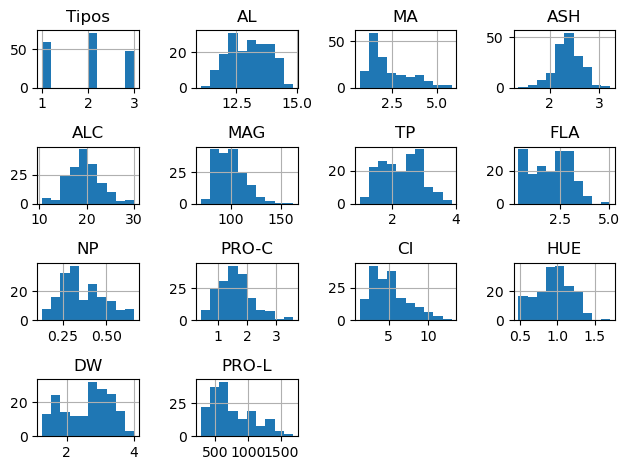

In [16]:
plt.figure(figsize = (12,12))
df.hist()
plt.tight_layout()

<Axes: >

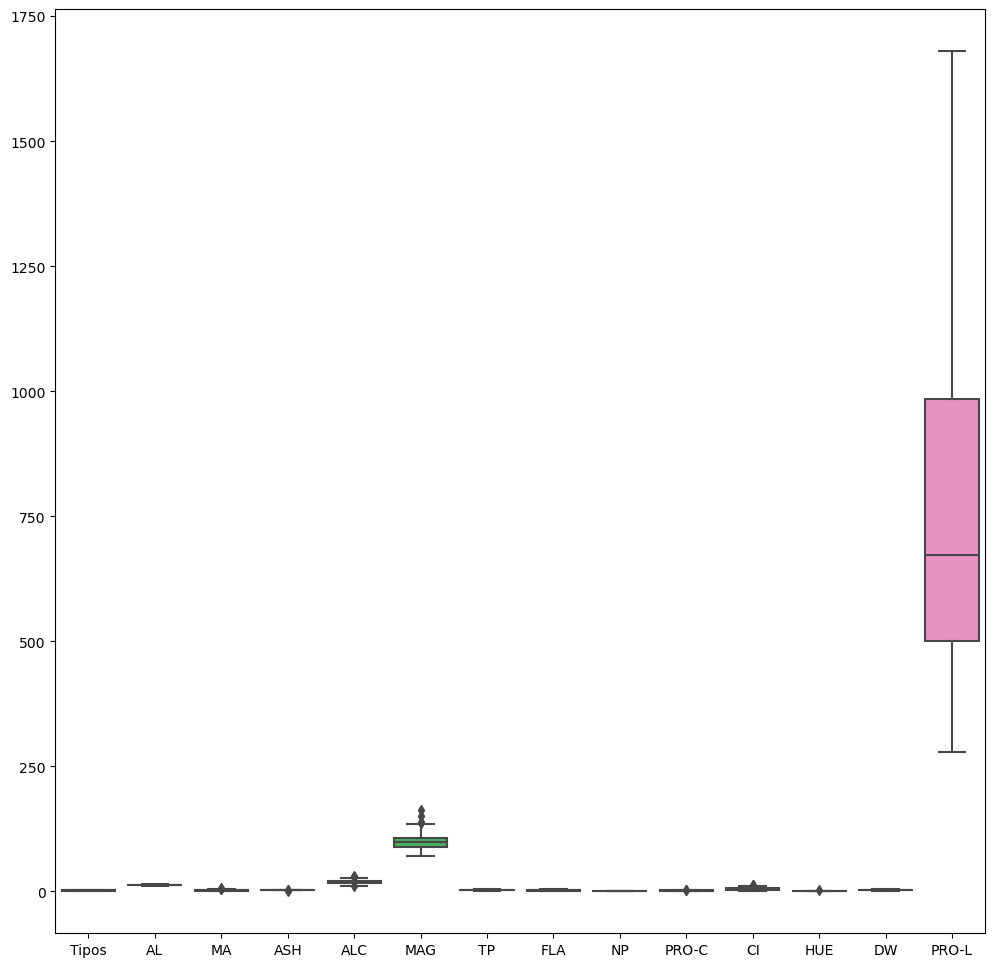

In [17]:
plt.figure(figsize=(12, 12))
sns.boxplot(data=df)

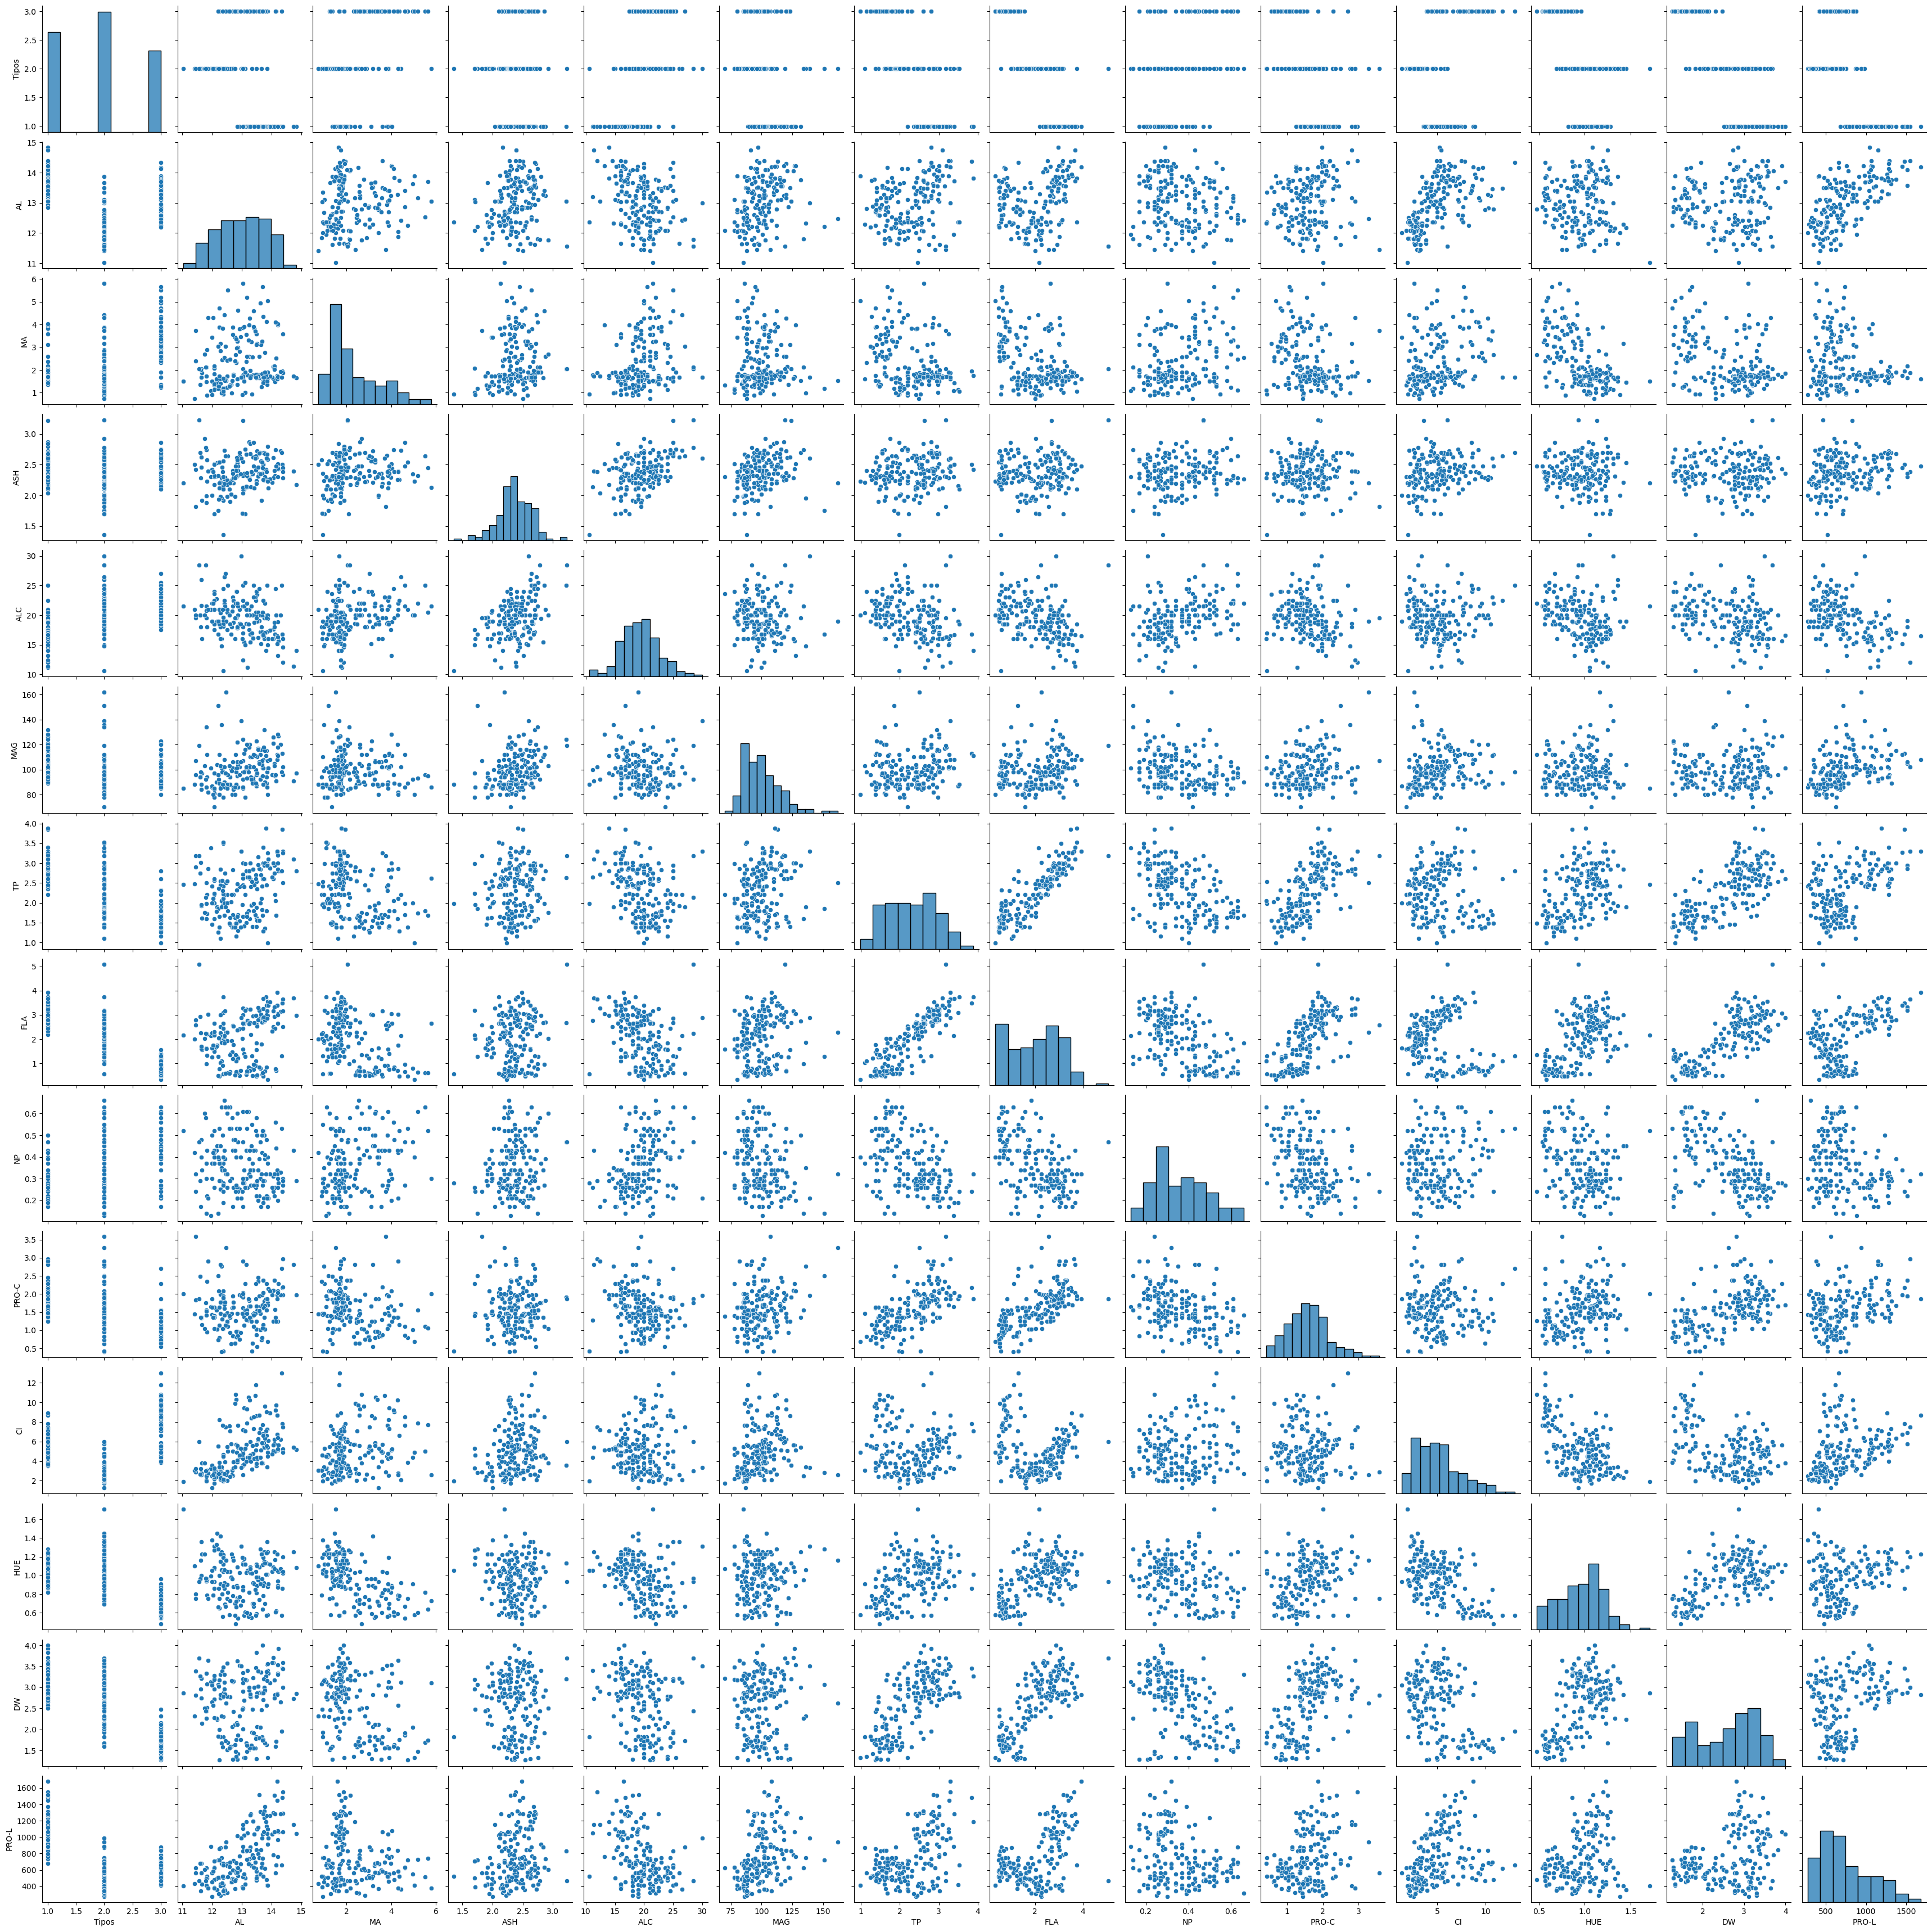

In [18]:
sns.pairplot(df)

Observamos que la variable tipos se compone de tres valores, el resto tienen unas distribuciones No Gausianas y algunas cuentan con outliers.

# Excercici 5 

Aplica algun procés d'enginyeria per millorar els resultats (normalització, estandardització, mostreig...)

Començarem realitzant l'exercici 5, perquè els models que realitzarem en els primers exercicis siguin més efectius.

Per realitzar aquest exercici utilitzarem la següent documentació [link documentació](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html#sklearn.preprocessing.RobustScaler)

Las variables con outliers son: MA, ASH, ALC, MAG, PRO-C, CI, HUE. A las que les aplicaremos un preprocesado de RobustScaler para gestionarlos.

In [19]:
df.columns

Index(['Tipos', 'AL', 'MA', 'ASH', 'ALC', 'MAG', 'TP', 'FLA', 'NP', 'PRO-C',
       'CI', 'HUE', 'DW', 'PRO-L'],
      dtype='object')

Realizamos una copia de nuestro data set original.

In [20]:
df.dos = df.copy()
df.dos

,Tipos,AL,MA,ASH,ALC,MAG,TP,FLA,NP,PRO-C,CI,HUE,DW,PRO-L
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


Aplicamos un escalado a las características de forma que sea más robusto a los valores atípicos o outliers.

In [22]:
rs = ['MA', 'ASH', 'ALC', 'MAG', 'PRO-C', 'CI', 'HUE']
Robust_scaler = preprocessing.RobustScaler().fit(df.dos[rs])
df.dos[rs] = Robust_scaler.transform(df.dos[rs])


df.dos.head()

,Tipos,AL,MA,ASH,ALC,MAG,TP,FLA,NP,PRO-C,CI,HUE,DW,PRO-L
0,1,14.23,-0.104730,0.201439,-0.906977,1.526316,2.80,3.06,0.28,1.050000,0.318792,0.222222,3.92,1065
1,1,13.20,-0.057432,-0.633094,-1.930233,0.105263,2.65,2.76,0.26,-0.392857,-0.104027,0.251852,3.40,1050
2,1,13.16,0.334459,0.892086,-0.209302,0.157895,2.80,3.24,0.30,1.792857,0.332215,0.192593,3.17,1185
3,1,14.37,0.057432,0.402878,-0.627907,0.789474,3.85,3.49,0.24,0.892857,1.043624,-0.311111,3.45,1480
4,1,13.24,0.489865,1.467626,0.348837,1.052632,2.80,2.69,0.39,0.378571,-0.124161,0.222222,2.93,735


Observamos la diferencia de datos respecto el dataframe original

In [23]:
df.head(10)

,Tipos,AL,MA,ASH,ALC,MAG,TP,FLA,NP,PRO-C,CI,HUE,DW,PRO-L
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


### División Traing/Test

Realizamos la división de nuestro dataframe para su posterior modelado.

In [24]:
X = df.dos.drop(['Tipos'],axis=1)
y = df.dos[['Tipos']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, train_size = 0.80)

Comprobamos el número de filas y columnas que tiene la copia del dataset que hemos realizado df.dos

In [25]:
df.dos.shape

(178, 14)

In [27]:
X.shape

(178, 13)

In [28]:
X_train.shape

(142, 13)

In [29]:
X_test.shape

(36, 13)

# Excercici 1

Crea almenys dos models de classificació diferents per intentar predir el millor les classes de l'arxiu adjunt.

## Modelo de regresión Logística

Este modelo es una técnica estadística multivariante que nos permite estimar la relación existente entre una variable dependiente no métrica, en particular dicotómica y un conjunto de variables independientes métricas o no métricas.

Utilizaremos la siguiente documentación [link documentación](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

### Iniciamos regresión logística

In [30]:
rl = LogisticRegression(random_state=42)

### Entrenamos el modelo

In [31]:
rl.fit(X_train, y_train)

LogisticRegression(random_state=42)

### Predicción

In [32]:
y_pred_rl = rl.predict(X_test)

y_pred_rl

array([3, 2, 1, 2, 1, 3, 2, 1, 3, 2, 1, 2, 2, 1, 2, 2, 3, 1, 2, 1, 1, 2,
       2, 2, 1, 3, 1, 1, 1, 3, 2, 3, 3, 1, 2, 2], dtype=int64)

## Modelo de Decision Tree

Este modelo nos da un algoritmo de árbol de decisión nos da una representación gráfica con posibles soluciones a una clasificación de un conjunto de datos.

Utilizaremos la siguiente documentación [link documentación](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

### Iniciamos Decision Tree

In [33]:
ad = DecisionTreeClassifier(random_state=0)

### Entrenamos el modelo

In [34]:
ad.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

### Calculamos la puntuación del modelo

In [35]:
ad.score(X_test, y_test)

0.9166666666666666

### Predecimos

In [38]:
y_pred_ad = ad.predict(X_test)

### Visualizamos Decisión Tree

[Text(0.5, 0.9166666666666666, 'PRO-L <= 755.0\ngini = 0.657\nsamples = 142\nvalue = [45, 58, 39]'),
 Text(0.25, 0.75, 'FLA <= 1.235\ngini = 0.48\nsamples = 89\nvalue = [1, 55, 33]'),
 Text(0.125, 0.5833333333333334, 'CI <= -0.379\ngini = 0.165\nsamples = 33\nvalue = [0, 3, 30]'),
 Text(0.0625, 0.4166666666666667, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(0.1875, 0.4166666666666667, 'gini = 0.0\nsamples = 30\nvalue = [0, 0, 30]'),
 Text(0.375, 0.5833333333333334, 'HUE <= -0.948\ngini = 0.135\nsamples = 56\nvalue = [1, 52, 3]'),
 Text(0.3125, 0.4166666666666667, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.4375, 0.4166666666666667, 'MA <= 1.392\ngini = 0.037\nsamples = 53\nvalue = [1, 52, 0]'),
 Text(0.375, 0.25, 'gini = 0.0\nsamples = 48\nvalue = [0, 48, 0]'),
 Text(0.5, 0.25, 'MA <= 1.537\ngini = 0.32\nsamples = 5\nvalue = [1, 4, 0]'),
 Text(0.4375, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.5625, 0.08333333333333333, 'gini = 0.0\n

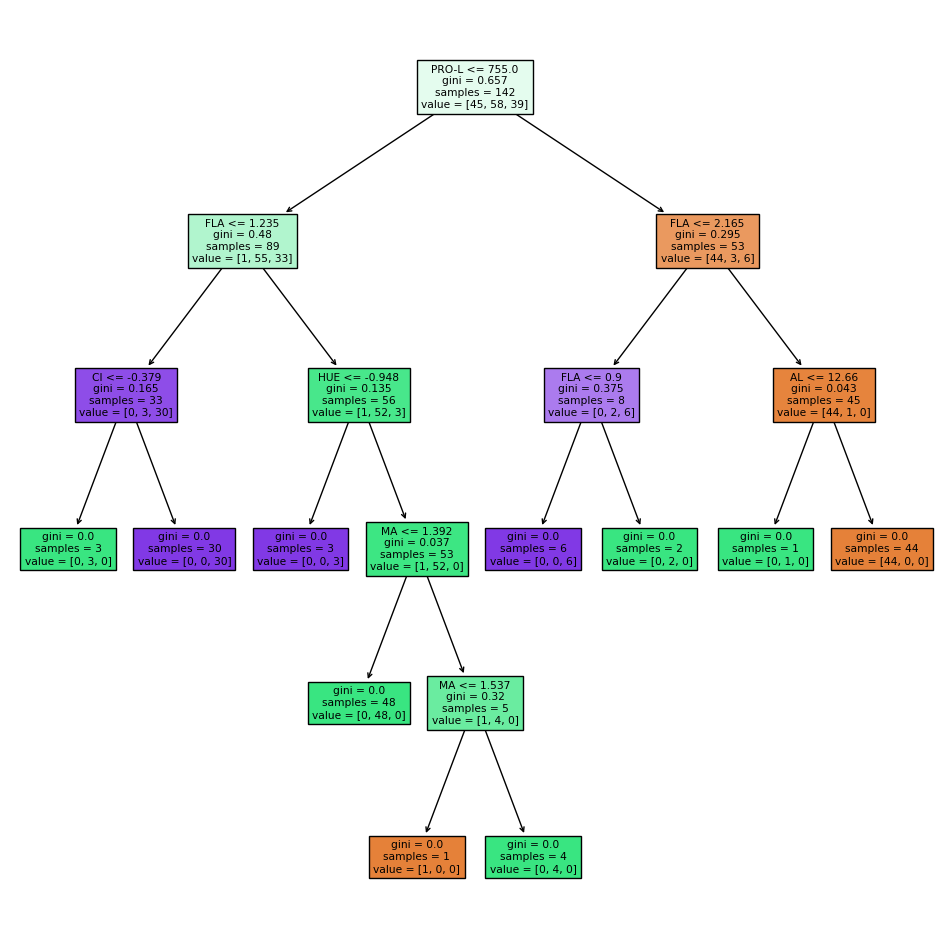

In [40]:
plt.figure(figsize=(12, 12))
plot_tree(decision_tree=ad, feature_names=X.columns.tolist(), filled=True)

# Exercici 2

Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confusió i d’altres mètriques més avançades.

### Accuracy

In [41]:
acc_rl = accuracy_score(y_test, y_pred_rl)
acc_ad = accuracy_score(y_test, y_pred_ad)

In [42]:
tabla_accuracy = pd.DataFrame({'Modelo': ['Regresión Logística', 'Decission Tree'],'Accuracy': [acc_rl, acc_ad]})

tabla_accuracy

,Modelo,Accuracy
0,Regresión Logística,0.944444
1,Decission Tree,0.916667


**Conclusiones**: Nuestros dos modelos superan el 90% de exactitud (accuracy), pero ajustandonos a los datos el más adecuado para esta clasificación sería el modelo de Regresión Logística.

### Matriu de confusió

In [43]:
matriz_rl = confusion_matrix (y_test, y_pred_rl)
matriz_ad = confusion_matrix (y_test, y_pred_ad)

[Text(0.5, 1.0, 'Regresión Logística')]

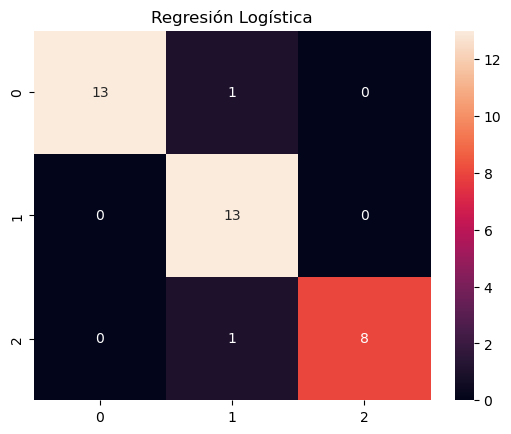

In [44]:
sns.heatmap(matriz_rl, annot=True).set(title='Regresión Logística')

[Text(0.5, 1.0, 'Decission Tree')]

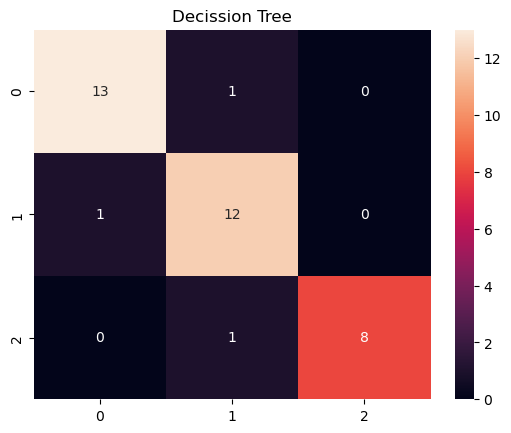

In [45]:
sns.heatmap(matriz_ad, annot=True).set(title='Decission Tree')

**Conclusiones**: Ambos modelos de clasificación puden devolver falsos negativos.

## Exercici 3

Entrena’ls usant els diferents paràmetres que admeten per tal de millorar-ne la predicció.

Utilizaremos la siguiente documentación [link documentación](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV)

### Modelo de Regresión Logística

In [48]:
rl_uno = LogisticRegression(random_state=42)
rl_uno.fit(X_train, y_train)
y_pred_rl_uno = rl_uno.predict(X_test)

y_pred_rl_uno

array([3, 2, 1, 2, 1, 3, 2, 1, 3, 2, 1, 2, 2, 1, 2, 2, 3, 1, 2, 1, 1, 2,
       2, 2, 1, 3, 1, 1, 1, 3, 2, 3, 3, 1, 2, 2], dtype=int64)

In [ ]:
a continuación 

In [49]:
rl_uno.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

Explicación de estos parámetros:

**C**: Parámetro de regularización. Valores más altos especifican una regularización más débil.  
**class_weight**: Peso asociado a cada clase en un problema de clasificación. Si es None, todos los pesos son iguales.  
**dual**: Formulación dual o primal del problema de optimización. Por defecto, es False.  
**fit_intercept**: Indica si se debe calcular el término de intercepción.  
**max_iter**: Número máximo de iteraciones para la convergencia.  
**multi_class**: Especifica el enfoque para resolver problemas de clasificación multiclase.  
**penalty**: Tipo de regularización a aplicar (l1, l2, elasticnet).  
**random_state**: Semilla para controlar la aleatoriedad para reproducibilidad.  
**solver**: Algoritmo para optimizar el problema.  
**tol**: Tolerancia para la detención del algoritmo.  
**verbose**: Controla la cantidad de salida del proceso de ajuste.  
**warm_start**: Si es True, reutiliza la solución de la llamada anterior para ajustar y agregar más estimaciones al conjunto de coeficientes existente.  


A continuación vamos a crear un diccionario 'param_grid' que contiene una rejilla de hiperparámetros que se utilizarán para buscar la mejor combinación de solver y penalty en un proceso de búsqueda de hiperparámetros.

In [51]:
param_grid = dict()
param_grid['solver'] = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
param_grid['penalty'] = ["l1", "l2", "elasticnet"]

In [52]:
search = GridSearchCV(rl_uno, param_grid, scoring = 'f1_macro')
search.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(random_state=42),
             param_grid={'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='f1_macro')

In [53]:
print(search.best_params_)

{'penalty': 'l2', 'solver': 'newton-cg'}


**Conclusión:** Estos resultados sugieren que, según la métrica F1 macro y los datos de entrenamiento utilizados, el modelo de regresión logística se desempeñó mejor cuando se aplicó una penalización de tipo L2 y se utilizó el solucionador 'newton-cg'. Estos serían los parámetros recomendados para utilizar en este modelo específico con estos datos y métricas de evaluación.  

· El mejor tipo de penalización (**penalty**) encontrado fue '**l2**', lo que indica que la regularización L2 (también conocida como regresión ridge) fue la más adecuada para este modelo.  

· El mejor solucionador (**solver**) encontrado fue '**newton-cg**', que es uno de los algoritmos utilizados para resolver el problema de optimización asociado con la regresión logística.

### Decision Tree

In [54]:
ad_uno = DecisionTreeClassifier(random_state=0)
ad_uno.fit(X_train, y_train)
y_pred_ad_uno = ad_uno.predict(X_test)

In [55]:
ad_uno.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

Explicación de estos parámetros:  

**ccp_alpha**: Parámetro de complejidad de poda, utilizado para la poda de costo-complejidad del árbol.  
**class_weight**: Peso asociado a cada clase en un problema de clasificación. Si es None, todos los pesos son iguales.  
**criterion**: Criterio utilizado para medir la calidad de una división. En este caso, 'gini' indica que se está utilizando el índice Gini.  
**max_depth**: Profundidad máxima del árbol. Si es None, los nodos se expanden hasta que todas las hojas sean puras o contengan menos de min_samples_split.  
**max_features**: Número de características a considerar al buscar la mejor división.  
**max_leaf_nodes**: Número máximo de nodos hoja.  
**min_impurity_decrease**: Un nodo se dividirá si la división induce una disminución de la impureza mayor o igual a este valor. **min_samples_leaf**: Número mínimo de muestras requeridas para estar en un nodo hoja.  
**min_samples_split**: Número mínimo de muestras requeridas para dividir un nodo interno.  
**min_weight_fraction_leaf**: Fracción mínima del peso total (de todas las muestras de entrada) requerida para estar en un nodo hoja.  
**random_state**: Semilla para controlar la aleatoriedad para reproducibilidad.  
**splitter**: Estrategia utilizada para elegir la división en cada nodo. 'best' elige la mejor división.

A continuación vamos a preparar la configuración para realizar una búsqueda de hiperparámetros de nuestro modelo de árbol de decisión (DecisionTreeClassifier) utilizando validación cruzada repetida estratificada (RepeatedStratifiedKFold).

In [56]:
cv_method = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)
params_ad_uno = {'criterion': ['entropy','gini'], 'max_depth': [3,5,7], 'splitter' : ['best','random']}
model_ad_uno = DecisionTreeClassifier(random_state = 0)

In [57]:
search_ad_uno = GridSearchCV(estimator=model_ad_uno, param_grid=params_ad_uno, cv=cv_method, verbose=1,  scoring='accuracy', return_train_score=True)
search_ad_uno.fit(X, y)

Fitting 15 folds for each of 12 candidates, totalling 180 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=0),
             estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [3, 5, 7],
                         'splitter': ['best', 'random']},
             return_train_score=True, scoring='accuracy', verbose=1)

In [58]:
acc_rl_uno = accuracy_score(y_test, y_pred_rl_uno)
acc_ad_uno = accuracy_score(y_test, y_pred_ad_uno)
tabla_comparacion_acc = pd.DataFrame({'Modelo': ['Regresión Logística', 'Decission Tree'],'Accuracy A': [acc_rl, acc_ad], 'Accuracy B': [acc_rl_uno, acc_ad_uno]})

tabla_comparacion_acc

,Modelo,Accuracy A,Accuracy B
0,Regresión Logística,0.944444,0.944444
1,Decission Tree,0.916667,0.916667


**Conclusiones**: Ambos modelos tienen un rendimiento similar en estos conjuntos de datos de prueba específicos. Podemos observar que la precisión es constante entre los conjuntos de datos de prueba A y B para cada modelo, lo cual puede ser una señal de robustez en la capacidad predictiva de los modelos en diferentes conjuntos de datos.








## Excercici 4

Compara el seu rendiment fent servir l’aproximació traint/test o cross-validation.

Utilizaremos la siguiente documentación [link documentación](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)

In [59]:
cv_scores = cross_val_score(rl, X, y, cv=5)
print(cv_scores)

[0.94444444 0.91666667 0.91666667 0.94285714 0.97142857]


In [60]:
print('Promedio 5-Fold CV Score: {}'. format(np.mean(cv_scores)))

Promedio 5-Fold CV Score: 0.9384126984126985


In [61]:
cv_scores_ad = cross_val_score(ad, X, y, cv=5)
print(cv_scores_ad)

[0.94444444 0.83333333 0.88888889 0.91428571 0.85714286]


In [62]:
print('Promedio 5-Fold CV Score: {}'. format(np.mean(cv_scores_ad)))

Promedio 5-Fold CV Score: 0.8876190476190475


**Conclusiones:** Utilizando un K-folds de 5 para iterar el modelo. En este caso vemos que nuestro modelo de Regresión Logística es el que menos sesgo ofrece.

Nota recordatorio: el ejercicio 5 lo he realizado antes que el ejercicio 1.